<a href="https://colab.research.google.com/github/Shufen-Yin/Artificial-Intelligence/blob/main/Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [4]:
# Task1 Data preparation
digits=load_digits()
x= digits.data
y=digits.target
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


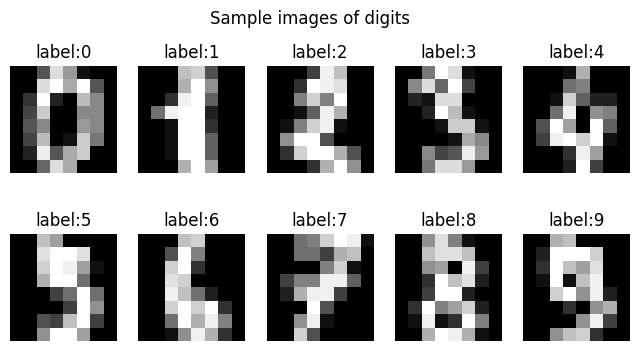

In [10]:
# plot some sample images
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x[i].reshape(8,8),cmap='gray')
    plt.axis("off")
    plt.title(f"label:{y[i]}")
plt.suptitle('Sample images of digits')
plt.show()


In [12]:
# EDA is to understand the distribution and characteristics of the data
# (1) Label Distribution
pd.Series(y).value_counts().sort_index()

,count
0,178
1,182
2,177
3,183
4,181
5,182
6,181
7,179
8,174
9,180


In [13]:
# (2) Feature Statistics
"""
Look at pixel ranges, average intensity, and variation
Decide whether normalization is needed
"""
print("Min pixel value:", x.min())
print("Max pixel value:", x.max())
print("Mean pixel value:", x.mean())
print("Pixel variance:", x.var())


Min pixel value: 0.0
Max pixel value: 16.0
Mean pixel value: 4.884164579855314
Pixel variance: 36.20173240585726


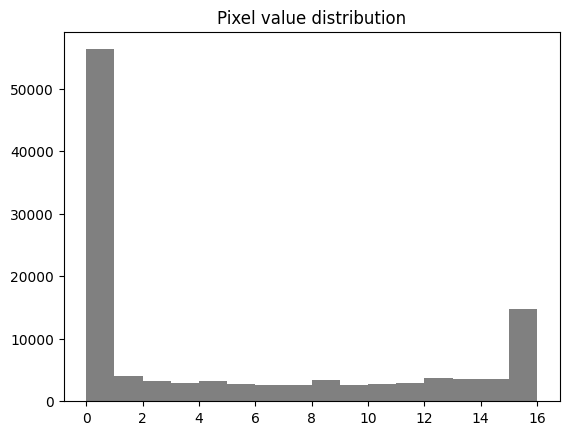

In [14]:
# (3) Pixel Value Histogram
# Understand overall grayscale distribution. See if many pixels are zero → sparsity of images
plt.hist(x.flatten(), bins=16, color='gray')
plt.title("Pixel value distribution")
plt.show()


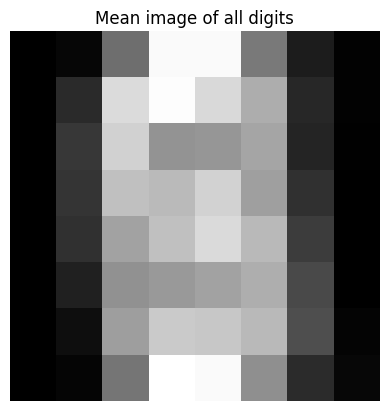

In [15]:
# (4) Mean Image
mean_image = x.mean(axis=0).reshape(8,8)
plt.imshow(mean_image, cmap='gray')
plt.title("Mean image of all digits")
plt.axis("off")
plt.show()


Min = 0, Max = 16 → Each pixel is an integer from 0 (black) to 16 (white)

Mean ≈ 4.88 → Most pixels are closer to black than white

Variance ≈ 36.2 → Pixel intensities vary significantly, so the images are not completely uniform

💡 Insight:

Pixel values are small integers (0–16), so you might normalize them (e.g., divide by 16) before feeding into models like neural networks.

Some pixels are mostly 0 → the images are sparse (many dark/empty areas).

What this tells us about the dataset

The dataset is balanced and clean

The features (pixels) vary enough to distinguish digits

The pixel range and sparsity suggest preprocessing options like normalization or scaling for ML models

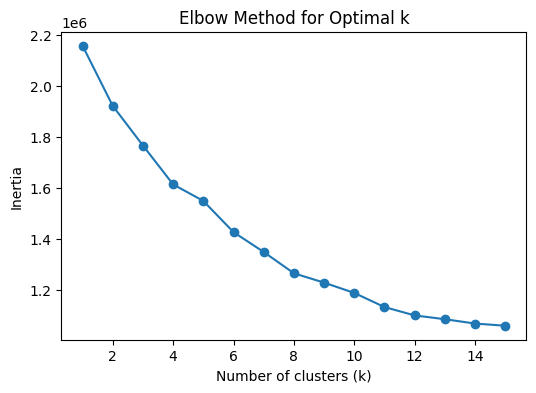

In [16]:
# Task 2: Clustering
# 1 Determine the optimal number of clusters (Elbow Method)
inertia_list = []

# Test k from 1 to 15
for k in range(1, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)  # x is the flattened digits
    inertia_list.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6,4))
plt.plot(range(1,16), inertia_list, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Explanation:

inertia_ = sum of squared distances of samples to their nearest cluster center

Look for a “knee/elbow” in the plot → optimal number of clusters

Since we have digits 0–9, we might expect k ≈ 10, but the elbow plot confirms it.

In [17]:
# 2 Apply K-Means
# Suppose we choose k = 10:
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(x)  # Assign each sample to a cluster
centroids = kmeans.cluster_centers_  # Cluster centers (mean image of each cluster)


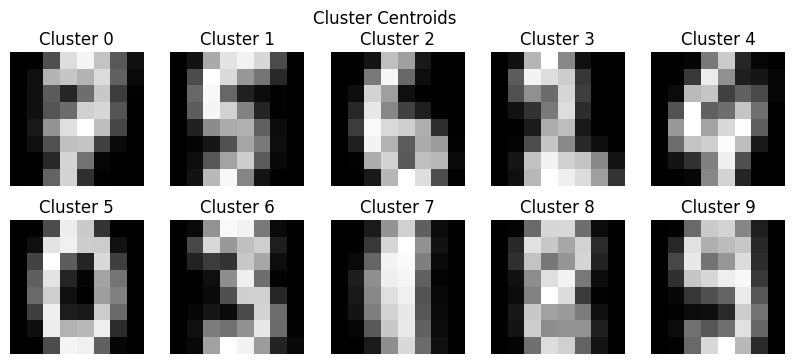

In [18]:
# 3 Visualize cluster centroids
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(centroids[i].reshape(8,8), cmap='gray')
    plt.axis('off')
    plt.title(f'Cluster {i}')
plt.suptitle('Cluster Centroids')
plt.show()



Interpretation:

Each centroid represents the average image of that cluster

You can roughly see which digit each cluster corresponds to

In [19]:
# 4 Analyze cluster characteristics

pd.Series(clusters).value_counts().sort_index()
for i in range(10):
    print(f"Cluster {i}:")
    print(pd.Series(y[clusters==i]).value_counts())
    print("-"*30)



Cluster 0:
7    169
9      8
3      7
4      5
2      2
8      2
Name: count, dtype: int64
------------------------------
Cluster 1:
5    137
9      4
8      2
3      2
1      1
Name: count, dtype: int64
------------------------------
Cluster 2:
6    176
1      2
5      2
8      1
Name: count, dtype: int64
------------------------------
Cluster 3:
2    146
1     23
8      3
3      1
Name: count, dtype: int64
------------------------------
Cluster 4:
4    159
9      3
5      2
0      2
Name: count, dtype: int64
------------------------------
Cluster 5:
0    176
6      1
2      1
Name: count, dtype: int64
------------------------------
Cluster 6:
3    159
2     12
1      1
9      1
Name: count, dtype: int64
------------------------------
Cluster 7:
1    130
8     14
4     13
2      6
6      3
9      1
Name: count, dtype: int64
------------------------------
Cluster 8:
8    136
7     10
2      9
3      6
4      4
9      3
1      3
6      1
Name: count, dtype: int64
-----------------------

Explanation:

This shows which actual digits are grouped into each cluster

Some clusters might mix similar-looking digits (like 1 and 7, or 3 and 5)

✅ Summary

Elbow Method → find optimal k

K-Means → assign images to clusters

Centroids → visualize average images

Cluster analysis → compare clusters to true labels

Clustering is unsupervised, so we don’t use labels to train, but we can use them to interpret clusters afterwards.

In [25]:
# Task 3 Model Evaluation and Prediction
x_new = x[0:5]  # first 5 images as new instances
new_labels = kmeans.predict(x_new)
print("Cluster labels for new images:", new_labels)

# Analyze fit with existing clusters



Cluster labels for new images: [5 9 9 1 3]


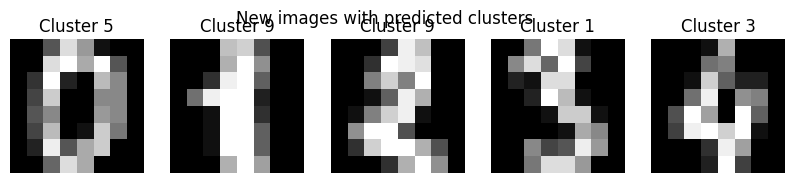

In [26]:
# visualize new images and predicted clusters
plt.figure(figsize=(10,2))
for i in range(len(x_new)):
    plt.subplot(1,5,i+1)
    plt.imshow(x_new[i].reshape(8,8), cmap='gray')
    plt.axis('off')
    plt.title(f'Cluster {new_labels[i]}')
plt.suptitle("New images with predicted clusters")
plt.show()


In [27]:
# Task 4 Dimensionality Reduction and Visualization
# 1 PCA (Principal Component Analysis)

from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(x)

print("Original shape:", x.shape)
print("Reduced shape:", x_pca.shape)


Original shape: (1797, 64)
Reduced shape: (1797, 2)


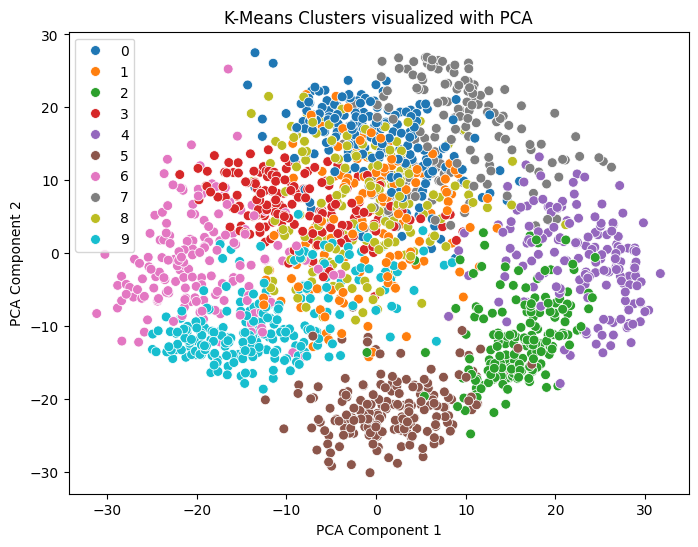

In [28]:
# 2 Visualize clusters in PCA space

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=x_pca[:,0],
    y=x_pca[:,1],
    hue=clusters,        # color by K-Means cluster
    palette="tab10",
    legend='full',
    s=50
)
plt.title("K-Means Clusters visualized with PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


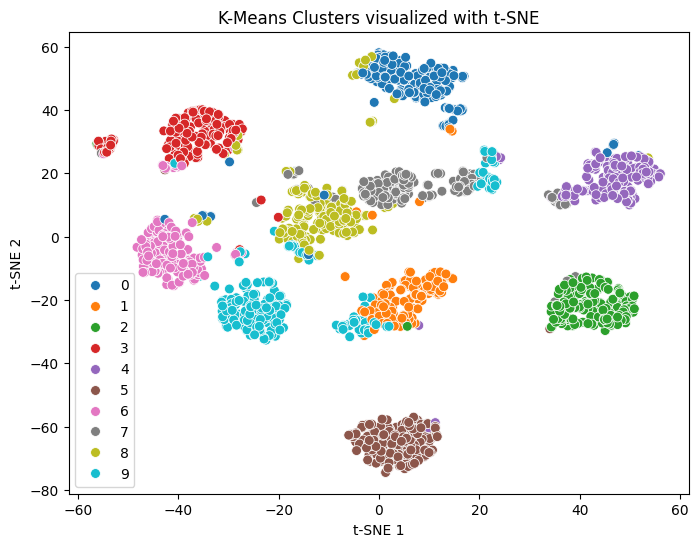

In [29]:
# 3: t-SNE (t-distributed Stochastic Neighbor Embedding)
# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
x_tsne = tsne.fit_transform(x)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=x_tsne[:,0],
    y=x_tsne[:,1],
    hue=clusters,
    palette="tab10",
    legend='full',
    s=50
)
plt.title("K-Means Clusters visualized with t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()


t-SNE focuses on local relationships, so similar digits are more likely to be close together
We often see more clearly separated clusters compared to PCA

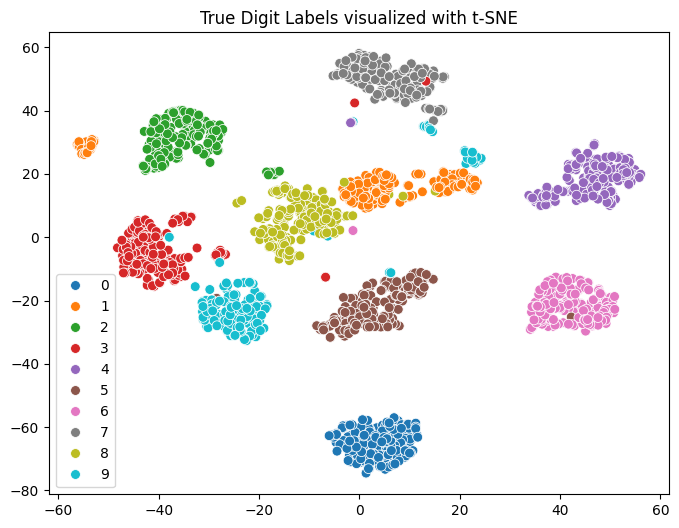

In [30]:
# 4 Compare with true labels
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=x_tsne[:,0],
    y=x_tsne[:,1],
    hue=y,
    palette="tab10",
    legend='full',
    s=50
)
plt.title("True Digit Labels visualized with t-SNE")
plt.show()


Helps check if K-Means clusters align with actual digits

Useful for evaluating clustering effectiveness

Summary

PCA → fast linear reduction, shows overall variance

t-SNE → slower non-linear reduction, often separates clusters more clearly

Visualization → color points by clusters to assess clustering quality

Compare with true labels → see if clusters match actual digits